# Clustering Countries 
### - OBJECTIVE
- To categorise countries using socio-eonomic and health factors that determine the **overall development of the country**
- Then, based upon the countries which have been categorised figure out the countries that are in **need of health and socio - economic help.**

In [7]:
%matplotlib inline

In [8]:
import pandas as pd
import numpy as np
import math
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
pd.set_option('display.max_colwidth',-1)

In [76]:
df_raw = pd.read_csv(r"D:\ML\Clustering Countries\Country-data.csv")

In [77]:
df_raw

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


### The above dataset corresponds to an **unsupervised learning** problem as there is no target feature involved.
- The model employed in forming clusters is going to be **K-Means Clustering**.
- **'child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp'** are all the features that will form the basis of our clusters.

In [203]:
df_raw.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [204]:
data_dict = pd.read_csv(r"D:\ML\Clustering Countries\data-dictionary.csv")

In [205]:
data_dict

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 1000 live births
2,exports,Exports of goods and services per capita. Given as %age of the GDP per capita
3,health,Total health spending per capita. Given as %age of GDP per capita
4,imports,Imports of goods and services per capita. Given as %age of the GDP per capita
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of the Total GDP
7,life_expec,The average number of years a new born child would live if the current mortality patterns are to remain the same
8,total_fer,The number of children that would be born to each woman if the current age-fertility rates remain the same.
9,gdpp,The GDP per capita. Calculated as the Total GDP divided by the total population.


In [206]:
df_raw.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [217]:
df_raw.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,income_and_health,exports/imports
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032,-0.522618,-0.266687
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725,0.335731,0.426385
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966,0.546287,-0.286837
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498,0.080558,-0.203268
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571,0.780358,0.566030
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631,-0.258342,0.217699
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089,0.625066,0.306512
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910,-0.507023,-0.268503
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000,0.921149,0.383750
income_and_health,-0.522618,0.335731,0.546287,0.080558,0.780358,-0.258342,0.625066,-0.507023,0.921149,1.000000,0.282510


# Missing Values

In [207]:
d = {}
for c in df_raw.columns:
    data = df_raw[c]
    d[c] = 0
    for k in data:
        if(k==np.nan or k == None or k==0):
            d[c] = d.get(c,0)+1
print("Missing values for the data set\n")
for i,j in d.items():
    print(i,":",j)

Missing values for the data set

country : 0
child_mort : 0
exports : 0
health : 0
imports : 0
income : 0
inflation : 0
life_expec : 0
total_fer : 0
gdpp : 0


- The above code shows that there are **no missing** values in the given data set.
- We can now go further with the analysis of our features of the data set.

# Analysis
- Since the objective of our cluster analysis is to group countries based on their respective develpment rates, a good way to **define development of a country** can be on the basis of **health, income and GDP per capita**.
- This is derived from the fact that if the **GDP per capita is high** it inturn means that **exports are high** and **imports are lower**
- Also, if the **health expenditure** of a country is high **a drop in mortality rate** is bound to follow.


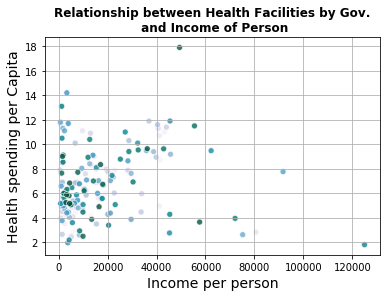

In [382]:
sns.scatterplot(df_raw.income,df_raw.health,hue = df_raw.country ,palette = 'PuBuGn',legend = False,alpha = 0.8)
plt.grid()
plt.xlabel("Income per person",fontsize = 14)
plt.ylabel("Health spending per Capita",fontsize = 14)
plt.title("Relationship between Health Facilities by Gov.\n and Income of Person",fontweight = 'bold')
plt.savefig(r'D:\ML\Clustering Countries\health_and_income.png',dpi=200)

## Health and Income

- From the above plot it is noted that although **a country may have a lower health expenditure by the Gov.** but if the average **income of the country is high** then they would **not be much dependent** on the **Gov. provided facilities** and may look at private options.
- Another aspect that would come under
- Thus a new column **income and health** is created which is formed by multiplying the **income of a person with the health expenditure spent per capita** and the plot with **GDP per capita** shows an almost linear relationship.

In [78]:
df_raw['income_and_health'] = df_raw['health']*df_raw['income']

In [404]:
??plt.ylabel

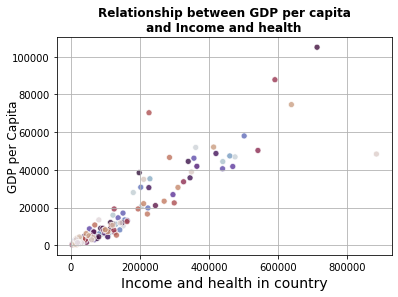

In [416]:
sns.scatterplot(df_raw.income_and_health,df_raw.gdpp,hue = df_raw.country ,palette = 'twilight',legend = False,alpha = 0.8)
plt.grid()
plt.xlabel("Income and health in country",fontsize = 14)
plt.ylabel("GDP per Capita",fontsize = 12,labelpad = -8)
plt.title("Relationship between GDP per capita\n and Income and health ",fontweight = 'bold')
plt.savefig(r'D:\ML\Clustering Countries\GDPp_income_health.png',dpi=200)

## Imports and Exports
- Another observation noted is that **EXPORTS/IMPORTS** ratio of a country is a **good metric** to define **development** and  the combined effect of **exports and imports** as it would be high when exports are high and imports are low meaning that the country is **capable of production beyond its local needs** and **imports** very less amount of **goods that may be exclusive to some other country**.

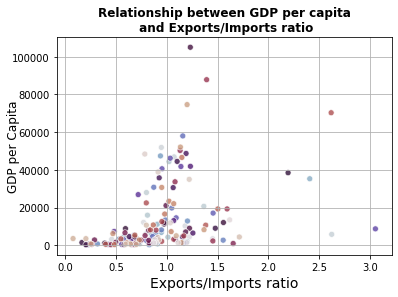

In [417]:
sns.scatterplot(df_raw.exports/df_raw.imports,df_raw.gdpp,hue = df_raw.country ,palette = 'twilight',legend = False,alpha = 0.8)
plt.grid()
plt.xlabel("Exports/Imports ratio",fontsize = 14)
plt.ylabel("GDP per Capita",fontsize = 12,labelpad = -8)
plt.title("Relationship between GDP per capita\n and Exports/Imports ratio",fontweight = 'bold')
plt.savefig(r'D:\ML\Clustering Countries\GDPp_export_import.png',dpi=200)

In [79]:
df_raw['exports/imports'] = df_raw['exports'] / df_raw['imports']

# Child Mortality and Total Fertility

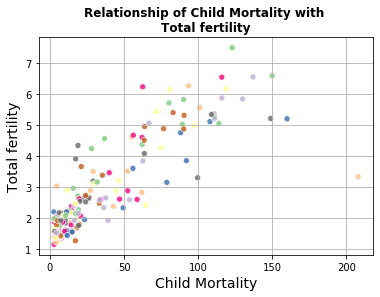

In [379]:
sns.scatterplot(df_raw.child_mort,df_raw.total_fer,hue = df_raw.country ,palette = 'Accent',legend = False,alpha = 0.8)
plt.title("Relationship of Child Mortality with \nTotal fertility",fontweight = 'bold')
plt.xlabel("Child Mortality",fontsize= 14)
plt.ylabel("Total fertility",fontsize =14)
plt.grid()
plt.savefig(r'D:\ML\Clustering Countries\fert_and_mortality.png',dpi=200)

- This relationship is an unsual relationship which highlights the fact that **the countries where the mortality rate of children under 5 years is high**, people are having **a greater number of children**.
- Although this relationship reveals a mindset that **people are afraid that their offspring would succumb** and hence they give birth to more number of children.
- Moreover, the second graph shows clearly that **the mortality rate and the total fertility** fall **exponentialy** with the **increasing health expenditure and increasing income**.
- So, a better **alternative** to having **more children** to would be to increase expenditure in **health** and the **income** of people in the country. 

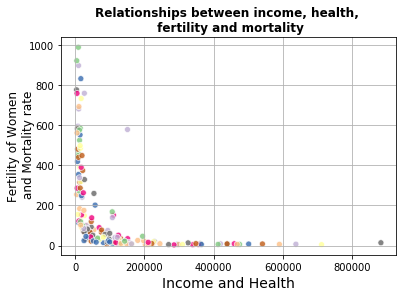

In [419]:
sns.scatterplot(df_raw.income_and_health,df_raw.child_mort*df_raw.total_fer,hue = df_raw.country ,palette = 'Accent',legend = 0,alpha = 0.8)
plt.xlabel("Income and Health",fontsize =14)
plt.ylabel("Fertility of Women\n and Mortality rate",fontsize = 12,labelpad=-6)
plt.title("Relationships between income, health, \n fertility and mortality",fontweight = 'bold')
plt.grid()
plt.savefig(r'D:\ML\Clustering Countries\income_health_fert_and_mort.png',dpi=200)

In [80]:
df_raw['fertility_and_mortality'] = df_raw['total_fer']*df_raw['child_mort']

In [81]:
df_raw.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,income_and_health,exports/imports,fertility_and_mortality
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689,123673.440419,0.923072,164.309737
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809,154521.492565,0.444450,229.866262
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000,3534.240000,0.079137,3.220000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000,17516.400000,0.649111,15.494000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000,65041.500000,0.893258,46.472000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000,152947.000000,1.133605,244.651500
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000,884260.000000,3.052910,988.500000


# Making the model 
- KMeans algorithm is imported from skleran library and StandardScaler is used for the scaling of data.
- Scaling of data is an important here as the K- means algorithm is a distance based algorithm and **varied distance values** can influence the results.

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

- Country name is dropped from the data set as it bears **no real significance to the development of a country**
- Moreover,it is a **categorical variable** which otherwise also could not have been used as a distance metric, even if it was one-hot encoded.

In [124]:
df = df_raw.drop('country',axis=1)

In [299]:
df.head(n=2)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,income_and_health,exports/imports,fertility_and_mortality
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,12203.8,0.222717,524.964
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,65041.5,0.576132,27.390


In [300]:
st = StandardScaler()
train = pd.DataFrame( st.fit_transform(df), columns = df.columns)

# Metrics 
- **INERTIA** and **Davies- Bouldin Index** were used as the metrics to measure the optimality of clusters.
- Both the metrics are should be minimized for **formation of optimal** clusters.

# Inertia 
- It is defined as the **intracluster distance**  for the cluster.
- The attribute **model.inertia_** provides the total inertia of the model summed up over **all the clusters**

In [4]:
import feather

In [500]:
train.to_feather('feather_data\country_cluster')

In [5]:
train = feather.read_dataframe('feather_data\country_cluster')

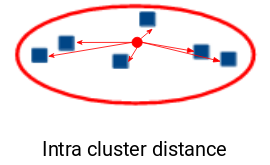

In [121]:
Image(r"D:\ML\Clustering Countries\inertia.png")

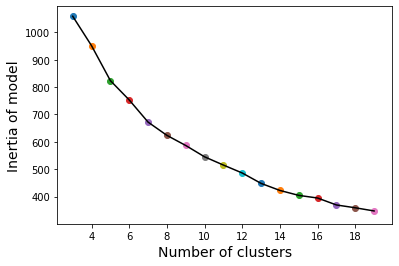

In [377]:
inert = []
for i in range(3,20):
    km = KMeans(n_clusters = i,init = 'k-means++',max_iter = 400)
    km.fit(train)
    plt.scatter(i,km.inertia_)
    inert.append(km.inertia_)
plt.plot([i for i in range(3,20)],inert,color = 'black')

plt.xlabel("Number of clusters",fontsize = 14)
plt.ylabel("Inertia of model",fontsize= 14)
plt.savefig(r'D:\ML\Clustering Countries\inertia.png',dpi=200)

In [12]:
from sklearn.metrics import davies_bouldin_score

# Davies - Bouldin Index
- This index looks to **minimize** the ratio of **maximum (intracluster-distances with inter-cluster distances)** for **all the pairs of clusters averaged over all clusters.**
- It is import from **sklearn.metrics** as **davies_bouldin_score**
- A detailed description is provided **in the pdf file attached.**

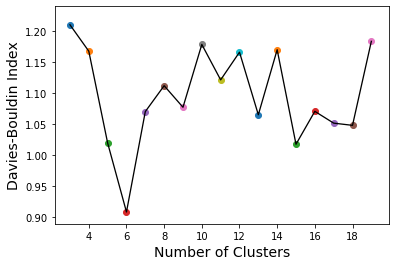

In [383]:
dbi = []
for i in range(3,20):
    km = KMeans(n_clusters = i,init = 'k-means++',max_iter = 350)
    km.fit(train)
    plt.scatter(i,davies_bouldin_score(train,km.labels_))
    dbi.append(davies_bouldin_score(train,km.labels_))
plt.plot([i for i in range(3,20)],dbi,color = 'black',linewidth = 1.3)
plt.xlabel("Number of Clusters",fontsize= 14)
plt.ylabel("Davies-Bouldin Index",fontsize = 14)
plt.savefig(r'D:\ML\Clustering Countries\davies_bouldin_score.png',dpi=200)

- We see that the **DBI** is minimum for number of clusters = 6.


# Final Model
- The final model that is used has-
 - **Clusters**- 6
 - **Initialization Algorithm**- KMeans ++
 - **Max- Iterations**- 400
 - **Distance Metric**- Euclidean

In [351]:
km = KMeans(n_clusters = 6,init = 'k-means++',max_iter = 350)
km.fit(train)


KMeans(max_iter=350, n_clusters=6)

In [352]:
davies_bouldin_score(train,km.labels_)

0.9077150660012654

In [353]:
km.inertia_

737.7225219581265

In [354]:
km.labels_

array([0, 1, 1, 0, 1, 1, 1, 3, 3, 2, 1, 2, 1, 1, 1, 3, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 0, 0, 1, 0, 3, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       3, 1, 1, 1, 1, 0, 0, 1, 1, 3, 3, 2, 0, 1, 3, 0, 3, 1, 1, 0, 0, 1,
       0, 1, 3, 1, 1, 1, 1, 3, 3, 3, 1, 3, 1, 2, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 2, 1, 4, 1, 0, 0, 1, 1, 0, 4, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       3, 3, 0, 5, 3, 2, 0, 1, 1, 1, 1, 1, 3, 2, 1, 1, 0, 1, 2, 0, 1, 1,
       0, 4, 1, 3, 1, 1, 1, 3, 1, 1, 0, 1, 3, 3, 1, 0, 1, 0, 0, 1, 1, 1,
       2, 0, 1, 2, 3, 3, 1, 1, 1, 2, 1, 0, 0])

In [355]:
clusters = pd.DataFrame(km.cluster_centers_,columns = train.columns)

In [356]:
label_dict = dict()
for i,j in zip(km.labels_,df_raw.country):
    if(i not in label_dict):
        label_dict[i] = []
    label_dict[i].append(j)
print("CLUSTERED COUNTRIES")
for k,j in label_dict.items():
    print("Label ",k,":",j)
    print()

CLUSTERED COUNTRIES
Label  0 : ['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Equatorial Guinea', 'Eritrea', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Niger', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'Sudan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen', 'Zambia']

Label  1 : ['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Bahamas', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Cambodia', 'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Fiji', 'Georgia', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'India

In [357]:
clusters.sort_values('income_and_health')

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,income_and_health,exports/imports,fertility_and_mortality
0,1.460289,-0.497766,-0.179754,-0.144600,-0.741912,0.207915,-1.297245,1.469959,-0.634762,-0.703919,-0.609073,1.492653
5,2.281385,-0.578452,-0.637438,-1.221785,-0.624065,9.129718,-1.134121,1.916133,-0.581936,-0.633286,1.198220,2.595768
1,-0.403097,-0.041615,-0.107283,0.093095,-0.270675,-0.124841,0.213980,-0.433521,-0.339942,-0.283333,-0.153746,-0.465897
2,-0.387429,0.706704,-1.142469,-0.525758,1.420212,0.720884,0.356363,-0.305975,0.520149,0.117552,2.248100,-0.439830
4,-0.849003,4.935673,-0.008163,4.548058,2.439542,-0.504206,1.226824,-1.038863,2.440797,1.886300,0.455945,-0.692183
3,-0.846102,0.022083,1.333459,-0.315500,1.177853,-0.620900,1.159154,-0.760037,1.725746,1.932927,0.260378,-0.683289


- The cluster Data Frame is sorted according to the **income and health product**.
- According to the **cluster dataframe**, it is noted that the countries clustered around **labels 0 and 5** had the **lowest cluster income and GDP percapita**.
- It was also noted that those countries had the **highest fertility and mortality product** which made them candidates that would actually require **external socio - economic help**

# Making new Dataframe for Cluster

### - Cluster 0
- This cluster represents the **most in need countries amongst the data set**.
- This cluster is now analysed according to different variables and the **top 20** countries are extracted out of it on this basis.

In [358]:
countries = label_dict[0]
df_label = pd.DataFrame(columns=df_raw.columns)
df_new = pd.DataFrame(columns=df_raw.columns)
for c in df_raw.country:
    if(c in countries):
        df_label = df_label.append(df_raw.loc[df_raw.country == c])
    else:
        df_new = df_new.append(df_raw.loc[df_raw.country==c])
    

# Clustered Countries

In [359]:
df_label.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,income_and_health,exports/imports,fertility_and_mortality
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,12203.8,0.222717,524.964
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,16815.0,1.452214,733.040
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,7462.0,0.639785,594.960
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,9638.2,0.648649,680.920
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,8862.4,0.227551,585.936


# Other countries

In [365]:
df_new

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,income_and_health,exports/imports,fertility_and_mortality
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090.0,65041.5,0.576132,27.390
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460.0,53793.0,1.222930,78.897
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200.0,115173.0,0.772496,21.939
5,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300.0,151470.0,1.181250,34.365
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220.0,29480.0,0.459161,30.589
...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,Uruguay,10.6,26.3,8.35,25.4,17100,4.91,76.4,2.08,11900.0,142785.0,1.035433,22.048
161,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380.0,24634.4,1.112281,84.942
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970.0,15487.5,0.884250,102.200
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500.0,81015.0,1.619318,42.237


In [361]:
df_label.gdpp = df_label.gdpp.astype(float,copy=True)

In [362]:
df_new.gdpp = df_new.gdpp.astype(float,copy=True)

In [363]:
df_label.describe()

,child_mort,exports,health,imports,inflation,life_expec,total_fer,gdpp,income_and_health,exports/imports,fertility_and_mortality
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,96.985366,27.505122,6.323415,43.400000,9.973049,59.053659,5.166585,1364.682927,15228.940244,0.653181,506.391488
std,31.882633,18.417580,2.744593,17.705042,7.547036,6.709773,0.931975,2630.633607,22411.459694,0.354456,199.392609
min,55.200000,2.200000,2.200000,17.200000,0.885000,32.100000,3.150000,231.000000,3534.240000,0.079137,240.768000
25%,74.700000,16.500000,4.510000,30.900000,3.870000,56.500000,4.670000,488.000000,8260.000000,0.423295,338.008000
50%,90.500000,22.800000,5.300000,42.700000,8.790000,59.500000,5.200000,708.000000,11815.000000,0.642612,480.555000
75%,111.000000,35.400000,7.650000,49.300000,16.100000,62.800000,5.710000,1220.000000,15973.200000,0.822222,585.936000
max,208.000000,85.800000,13.100000,101.000000,26.500000,71.100000,7.490000,17100.000000,150976.000000,1.555759,988.500000


In [364]:
df_new.describe()

,child_mort,exports,health,imports,inflation,life_expec,total_fer,gdpp,income_and_health,exports/imports,fertility_and_mortality
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,19.164286,45.535627,6.975873,48.025920,7.068817,74.298413,2.226032,16738.587302,158960.936508,1.010893,52.997421
std,18.327084,28.440885,2.739356,25.937246,11.317094,5.754080,0.790958,19632.212265,162589.257973,0.436413,81.086765
min,2.600000,0.109000,1.810000,0.065900,-4.210000,54.300000,1.150000,592.000000,7328.400000,0.205638,3.220000
25%,6.025000,27.825000,5.070000,30.025000,1.410000,70.700000,1.595000,3575.000000,45951.575000,0.785477,9.252000
50%,14.450000,39.600000,6.760000,44.900000,4.150000,74.900000,2.070000,8140.000000,105959.000000,0.951156,25.472000
75%,24.850000,54.250000,8.775000,60.600000,8.885000,79.000000,2.607500,22400.000000,210780.000000,1.157549,70.292250
max,130.000000,200.000000,17.900000,174.000000,104.000000,82.800000,5.840000,105000.000000,884260.000000,3.052910,759.200000


# Comparison of Income and health

In [366]:
df_label.sort_values("income_and_health",ascending=1)[:12]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,income_and_health,exports/imports,fertility_and_mortality
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446.0,3534.24,0.445283,776.290
50,Eritrea,55.2,4.79,2.66,23.3,1420,11.600,61.7,4.61,482.0,3777.20,0.205579,254.472
112,Niger,123.0,22.20,5.16,49.1,814,2.550,58.8,7.49,348.0,4200.24,0.452138,921.270
106,Mozambique,101.0,31.50,5.21,46.2,918,7.640,54.5,5.56,419.0,4782.78,0.681818,561.560
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334.0,4817.19,0.828629,758.640
93,Madagascar,62.2,25.00,3.77,43.0,1390,8.790,60.8,4.60,413.0,5240.30,0.581395,286.120
63,Guinea,109.0,30.30,4.93,43.2,1190,16.100,58.0,5.34,648.0,5866.70,0.701389,582.060
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769.0,6359.10,0.319149,418.950
94,Malawi,90.5,22.80,6.59,34.9,1030,12.100,53.1,5.31,459.0,6787.70,0.653295,480.555
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758.0,7462.00,0.639785,594.960


In [367]:
print("Income and Health Statistics ")
df_new.income_and_health.describe()

Income and Health Statistics 


count    126.000000   
mean     158960.936508
std      162589.257973
min      7328.400000  
25%      45951.575000 
50%      105959.000000
75%      210780.000000
max      884260.000000
Name: income_and_health, dtype: float64

- It is evident that the **income and health product** of the other dataframe that the **countries of this cluster** are very far behind it terms of both **income and health facilities** as the mean income and health of this cluster approximately **10%** of the other countries.

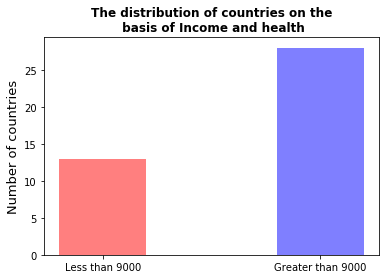

In [384]:
dat = dict()
for k in df_label.income_and_health:
    if(k<9000):
        dat['Less than 9000'] = dat.get('Less than 9000',0)+1
    else:
        dat['Greater than 9000'] = dat.get('Greater than 9000',0)+1
plt.bar([0,0.5],[dat['Less than 9000'],dat['Greater than 9000']],width = 0.2,alpha = 0.5,color = 'rb')
plt.xticks([0,0.5],['Less than 9000','Greater than 9000'])
plt.ylabel("Number of countries",fontsize = 13)
plt.title("The distribution of countries on the\n basis of Income and health",fontweight = 'bold')
plt.savefig(r'D:\ML\Clustering Countries\histo_income_health.png',dpi=200)

# Comparison of GDP per capita

In [369]:
df_label.sort_values("gdpp",ascending=True)[:15]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,income_and_health,exports/imports,fertility_and_mortality
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231.0,8862.40,0.227551,585.936
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327.0,8260.00,0.206263,448.286
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334.0,4817.19,0.828629,758.640
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348.0,4200.24,0.452138,921.270
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399.0,15982.00,0.486957,832.000
93,Madagascar,62.2,25.00,3.77,43.0,1390,8.79,60.8,4.60,413.0,5240.30,0.581395,286.120
106,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419.0,4782.78,0.681818,561.560
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446.0,3534.24,0.445283,776.290
94,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459.0,6787.70,0.653295,480.555
50,Eritrea,55.2,4.79,2.66,23.3,1420,11.60,61.7,4.61,482.0,3777.20,0.205579,254.472


In [370]:
print("GDP per capita statistics")
(df_new.gdpp.describe())

GDP per capita statistics


count    126.000000   
mean     16738.587302 
std      19632.212265 
min      592.000000   
25%      3575.000000  
50%      8140.000000  
75%      22400.000000 
max      105000.000000
Name: gdpp, dtype: float64

- The above statistic is derived from the **other dataframe** and highlights the **enormous disparity** between countries **in the cluster and other countries on average.**
- The mean for this dataset is **$16738$** whereas the current cluster has approximately **25** countries **$below 1000$** mark

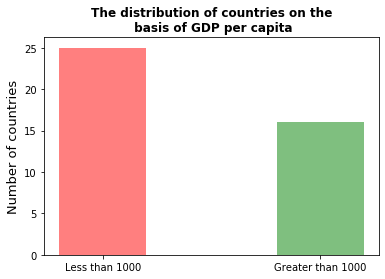

In [387]:
dat = dict()
for k in df_label.gdpp:
    if(k<1000):
        dat['Less than 1000'] = dat.get('Less than 1000',0)+1
    else:
        dat['Greater than 1000'] = dat.get('Greater than 1000',0)+1
plt.bar([0,0.5],[dat['Less than 1000'],dat['Greater than 1000']],width = 0.2,alpha = 0.5,color = 'rg')
plt.xticks([0,0.5],['Less than 1000','Greater than 1000'])
plt.ylabel("Number of countries",fontsize = 13)
plt.title("The distribution of countries on the\n basis of GDP per capita",fontweight = 'bold')
plt.savefig(r'D:\ML\Clustering Countries\histo_GDPp.png',dpi=200)

# Comparison of Fertility in females and Child Mortality Rate

In [386]:
df_label.sort_values('fertility_and_mortality',ascending = False)[:12]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,income_and_health,exports/imports,fertility_and_mortality
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897.0,8742.90,0.845977,988.500
112,Niger,123.0,22.20,5.16,49.1,814,2.550,58.8,7.49,348.0,4200.24,0.452138,921.270
97,Mali,137.0,22.80,4.98,35.1,1870,4.370,59.5,6.55,708.0,9312.60,0.649573,897.350
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.200,55.0,5.20,399.0,15982.00,0.486957,832.000
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446.0,3534.24,0.445283,776.290
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334.0,4817.19,0.828629,758.640
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530.0,16815.00,1.452214,733.040
66,Haiti,208.0,15.30,6.91,64.7,1500,5.450,32.1,3.33,662.0,10365.00,0.236476,692.640
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575.0,9638.20,0.648649,680.920
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758.0,7462.00,0.639785,594.960


In [376]:
print("Fertility Rate Statistics\n")
(df_new.fertility_and_mortality.describe())

Fertility Rate Statistics



count    126.000000
mean     52.997421 
std      81.086765 
min      3.220000  
25%      9.252000  
50%      25.472000 
75%      70.292250 
max      759.200000
Name: fertility_and_mortality, dtype: float64

- Again, the statistic derived from the **other dataframe** clearly highlights the differences in **Fertility in females and Child Mortality Rate** amongst the **clustered countries** and the **other countries**.
- From the data frame it is clear that the countries of this cluster is **10 times higher than the other countries**.
- It further strengthens the conclusion that these are the countries in **need of external help**

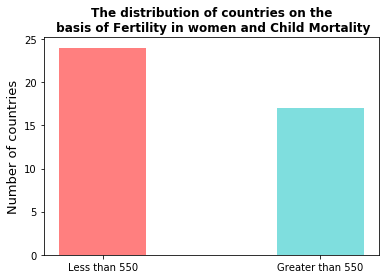

In [390]:
dat = dict()
for k in df_label.fertility_and_mortality:
    if(k<550):
        dat['Less than 550'] = dat.get('Less than 550',0)+1
    else:
        dat['Greater than 550'] = dat.get('Greater than 550',0)+1
plt.bar([0,0.5],[dat['Less than 550'],dat['Greater than 550']],width = 0.2,alpha = 0.5,color = 'rc')
plt.xticks([0,0.5],['Less than 550','Greater than 550'])
plt.ylabel("Number of countries",fontsize = 13)
plt.title("The distribution of countries on the\n basis of Fertility in women and Child Mortality",fontweight = 'bold')
plt.savefig(r'D:\ML\Clustering Countries\histo_fert_and_mortality.png',dpi=200)

## Shortlisting countries from dataset.
- Countries are shortlisted according to the above three classifiers and then the top **10** countries are extracted from each metric.
- Then, the union of these **counrty lists** provide the most **in need countries from the dataset**

In [394]:
inc_h = list(df_label.sort_values("income_and_health").country[:10])
gdp_p = list(df_label.sort_values("gdpp").country[:10])
fer_mort = list(df_label.sort_values("fertility_and_mortality",ascending = False).country[:10])

In [399]:
print("Based on income and health:",inc_h,"\n")
print("Based on GDP per capita :",gdp_p,"\n")
print("Based on fertility and mortality :",fer_mort)

Based on income and health: ['Central African Republic', 'Eritrea', 'Niger', 'Mozambique', 'Congo, Dem. Rep.', 'Madagascar', 'Guinea', 'Comoros', 'Malawi', 'Benin'] 

Based on GDP per capita : ['Burundi', 'Liberia', 'Congo, Dem. Rep.', 'Niger', 'Sierra Leone', 'Madagascar', 'Mozambique', 'Central African Republic', 'Malawi', 'Eritrea'] 

Based on fertility and mortality : ['Chad', 'Niger', 'Mali', 'Sierra Leone', 'Central African Republic', 'Congo, Dem. Rep.', 'Angola', 'Haiti', 'Burkina Faso', 'Benin']


## Top 2 Countries of each category
 - INCOME AND HEALTH - **'Central African Republic', 'Eritrea'**
 - GDP per capita - **'Burundi', 'Liberia'**
 - Fertility and Mortality - **'Chad', 'Niger'**

In [ ]:
final_list = list(set().union(inc_h,gdp_p,fer_mort))

In [400]:
final_list

['Congo, Dem. Rep.',
 'Mozambique',
 'Angola',
 'Mali',
 'Madagascar',
 'Malawi',
 'Burkina Faso',
 'Comoros',
 'Eritrea',
 'Liberia',
 'Sierra Leone',
 'Niger',
 'Central African Republic',
 'Burundi',
 'Chad',
 'Guinea',
 'Benin',
 'Haiti']